# The Statisical Sommelier: An Introduction to Linear Regression

### Bordeaux Wine

* Large differences in price and quality between years, although wine is produced in a similar way 

* Meant to be aged, so hard to tell if  wine will be good  when it is on the market 

* Can analytics be used to come up with a different system for judging wine?

### Building a Model

* March 1990 - Orley Ashenfelter, a Princeton economics professor, claims he can predict wine quality without tasting the wine 


* Ashenfelter used a method called
**linear regression** 
    + Predicts an outcome variable, or dependent variable 
    + Predicts using a set of independent variables 


* Dependent variable: typical price in 1990-1991 wine auctions (approximates quality)  


* Independent variables:
    + Age - older wines are more expensive 
    + Weather 
        - Average Growing Season Temperature 
        - Harvest Rain 
        - Winter Rain 

### Read in data

In [1]:
wine <- read.csv('data/wine.csv')
head(wine)

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>
1,1952,7.4950,600,17.1167,160,31,43183.57
2,1953,8.0393,690,16.7333,80,30,43495.03
3,1955,7.6858,502,17.1500,130,28,44217.86
4,1957,6.9845,420,16.1333,110,26,45152.25
5,1958,6.7772,582,16.4167,187,25,45653.81
6,1959,8.0757,485,17.4833,187,24,46128.64


In [2]:
str(wine)

'data.frame':	25 obs. of  7 variables:
 $ Year       : int  1952 1953 1955 1957 1958 1959 1960 1961 1962 1963 ...
 $ Price      : num  7.5 8.04 7.69 6.98 6.78 ...
 $ WinterRain : int  600 690 502 420 582 485 763 830 697 608 ...
 $ AGST       : num  17.1 16.7 17.1 16.1 16.4 ...
 $ HarvestRain: int  160 80 130 110 187 187 290 38 52 155 ...
 $ Age        : int  31 30 28 26 25 24 23 22 21 20 ...
 $ FrancePop  : num  43184 43495 44218 45152 45654 ...


In [3]:
summary(wine)

      Year          Price         WinterRain         AGST        HarvestRain   
 Min.   :1952   Min.   :6.205   Min.   :376.0   Min.   :14.98   Min.   : 38.0  
 1st Qu.:1960   1st Qu.:6.519   1st Qu.:536.0   1st Qu.:16.20   1st Qu.: 89.0  
 Median :1966   Median :7.121   Median :600.0   Median :16.53   Median :130.0  
 Mean   :1966   Mean   :7.067   Mean   :605.3   Mean   :16.51   Mean   :148.6  
 3rd Qu.:1972   3rd Qu.:7.495   3rd Qu.:697.0   3rd Qu.:17.07   3rd Qu.:187.0  
 Max.   :1978   Max.   :8.494   Max.   :830.0   Max.   :17.65   Max.   :292.0  
      Age         FrancePop    
 Min.   : 5.0   Min.   :43184  
 1st Qu.:11.0   1st Qu.:46584  
 Median :17.0   Median :50255  
 Mean   :17.2   Mean   :49694  
 3rd Qu.:23.0   3rd Qu.:52894  
 Max.   :31.0   Max.   :54602  

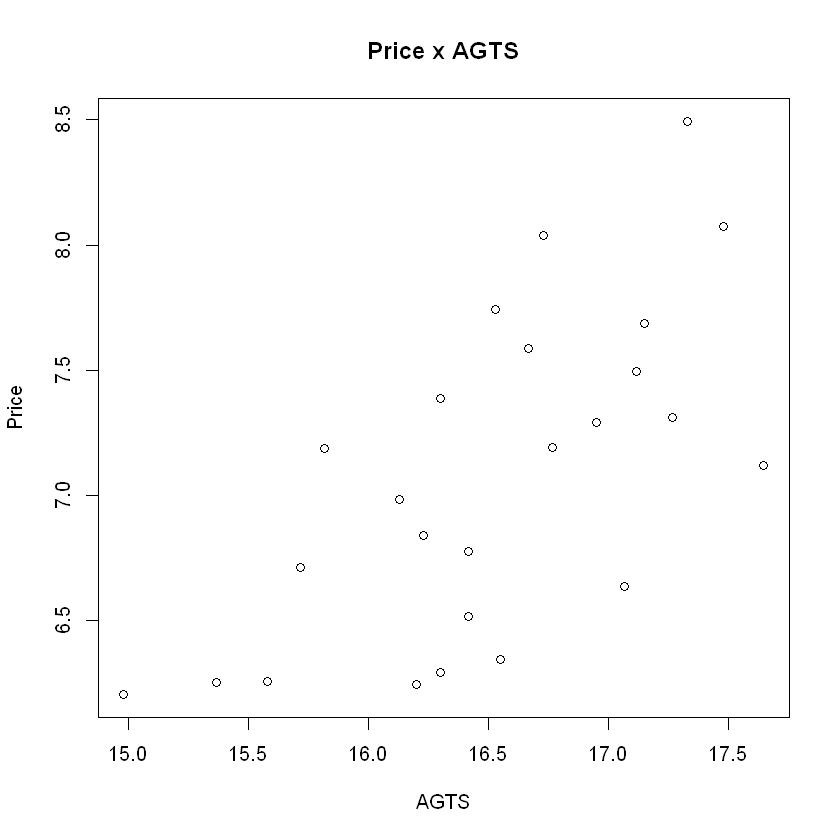

In [4]:
plot(wine$AGST, wine$Price, main = "Price x AGTS",xlab='AGTS',ylab='Price')

### Linear Regression (one variable)

In [5]:
model1 = lm(Price ~ AGST, data=wine)
summary(model1)


Call:
lm(formula = Price ~ AGST, data = wine)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.78450 -0.23882 -0.03727  0.38992  0.90318 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -3.4178     2.4935  -1.371 0.183710    
AGST          0.6351     0.1509   4.208 0.000335 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4993 on 23 degrees of freedom
Multiple R-squared:  0.435,	Adjusted R-squared:  0.4105 
F-statistic: 17.71 on 1 and 23 DF,  p-value: 0.000335


#### Sum of Squared Errors

In [6]:
model1$residuals

1           2           3           4           5           6 
 0.04204258  0.82983774  0.21169394  0.15609432 -0.23119140  0.38991701 
          7           8           9          10          11          12 
-0.48959140  0.90318115  0.45372410  0.14887461 -0.23882157 -0.08974238 
         13          14          15          16          17          18 
 0.66185660 -0.05211511 -0.62726647 -0.74714947  0.42113502 -0.03727441 
         19          20          21          22          23          24 
 0.10685278 -0.78450270 -0.64017590 -0.05508720 -0.67055321 -0.22040381 
         25 
 0.55866518

In [7]:
SSE = sum(model1$residuals^2)
SSE

[1] 5.734875

### Linear Regression (two variables)

In [8]:
model2 = lm(Price ~ AGST + HarvestRain, data=wine)
summary(model2)


Call:
lm(formula = Price ~ AGST + HarvestRain, data = wine)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.88321 -0.19600  0.06178  0.15379  0.59722 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.20265    1.85443  -1.188 0.247585    
AGST         0.60262    0.11128   5.415 1.94e-05 ***
HarvestRain -0.00457    0.00101  -4.525 0.000167 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3674 on 22 degrees of freedom
Multiple R-squared:  0.7074,	Adjusted R-squared:  0.6808 
F-statistic: 26.59 on 2 and 22 DF,  p-value: 1.347e-06


**Important:**

**Multiple R-squared** will always *increase* if you add more independent variables. But **Adjusted R-squared** will *decrease* if you add an independent variable that doesn't help the model.

(AGST only)      Multiple R-squared:  0.435,	Adjusted R-squared:  0.4105

(AGST + HarvestRain) Multiple R-squared:  0.7074,	Adjusted R-squared:  0.6808  -> **Better!**

#### Sum of Squared Errors

In [9]:
SSE = sum(model2$residuals^2)
SSE

[1] 2.970373

### Linear Regression (all variables)

In [10]:
model3 = lm(Price ~ AGST + HarvestRain + WinterRain + Age + FrancePop, data=wine)
summary(model3)


Call:
lm(formula = Price ~ AGST + HarvestRain + WinterRain + Age + 
    FrancePop, data = wine)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.48179 -0.24662 -0.00726  0.22012  0.51987 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.504e-01  1.019e+01  -0.044 0.965202    
AGST         6.012e-01  1.030e-01   5.836 1.27e-05 ***
HarvestRain -3.958e-03  8.751e-04  -4.523 0.000233 ***
WinterRain   1.043e-03  5.310e-04   1.963 0.064416 .  
Age          5.847e-04  7.900e-02   0.007 0.994172    
FrancePop   -4.953e-05  1.667e-04  -0.297 0.769578    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3019 on 19 degrees of freedom
Multiple R-squared:  0.8294,	Adjusted R-squared:  0.7845 
F-statistic: 18.47 on 5 and 19 DF,  p-value: 1.044e-06


**Model Analysis**

(AGST only) Multiple R-squared: 0.435, Adjusted R-squared: 0.4105

(AGST + HarvestRain) Multiple R-squared: 0.7074, Adjusted R-squared: 0.6808

(AGST + HarvestRain + WinterRain + Age + FrancePop) Multiple R-squared:  0.8294,	Adjusted R-squared:  0.7845 -> **Better!**

#### Sum of Squared Errors

In [11]:
SSE = sum(model3$residuals^2)
SSE

[1] 1.732113

### Coefficients

The **Estimate** column gives the coefficients for the intercept and for each of the independent variables in our model. The remaining columns help us to determine if a variable should be included in the model, or if its *coefficient is significantly different from 0*.

A coefficient of 0 means that the value of the independent variable does not change our prediction for the dependent variable. If a coefficient is not significantly different from 0, then we should probably remove the variable from our model.

Coefficients:

                 Estimate        Std. Error      t value      Pr(>|t|)    
              
    (Intercept)  4.504e-01       1.019e+01       -0.044       0.965202    

    AGST         6.012e-01       1.030e-01        5.836       1.27e-05   ***

    HarvestRain -3.958e-03       8.751e-04       -4.523       0.000233   ***

    WinterRain   1.043e-03       5.310e-04        1.963       0.064416   .  

    Age          5.847e-04       7.900e-02        0.007       0.994172    

    FrancePop   -4.953e-05       1.667e-04       -0.297       0.769578  

The **standard error** column gives a measure of how much the coefficient is likely to vary from the estimate value.

The **t value** is the estimate divided by the standard error. It will be negative if the estimate is negative and positive if the estimate is positive. The larger the absolute value of the t value, the more likely the coefficient is to be significant.
So we want independent variables with a large absolute value in this column. (t value = Estimate/Std.Error)

The **Pr column** gives a measure of how plausible it is that the coefficient is actually 0. The less plausible it is, or the smaller the probability number in this column, the less likely it is that our coefficient estimate is actually 0. We want independent variables with small values in this column.

### Star Coding

The star coding scheme is explained at the bottom of the Coefficients table.

**Three stars** is the highest level of significanceand corresponds to a probability value less than 0.001, or the smallest possible probabilities.

**Two stars** is also very significant and corresponds to a probability between 0.001 and 0.01.

**One star** is still significant and corresponds to a probability between 0.01 and 0.05.

A period, or **dot**, means that the coefficient is almost significant and corresponds to a probability between 0.05 and 0.10.

### Remove FrancePop

In [12]:
model4 = lm(Price ~ AGST + HarvestRain + WinterRain + Age, data=wine)
summary(model4)


Call:
lm(formula = Price ~ AGST + HarvestRain + WinterRain + Age, data = wine)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.45470 -0.24273  0.00752  0.19773  0.53637 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.4299802  1.7658975  -1.942 0.066311 .  
AGST         0.6072093  0.0987022   6.152  5.2e-06 ***
HarvestRain -0.0039715  0.0008538  -4.652 0.000154 ***
WinterRain   0.0010755  0.0005073   2.120 0.046694 *  
Age          0.0239308  0.0080969   2.956 0.007819 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.295 on 20 degrees of freedom
Multiple R-squared:  0.8286,	Adjusted R-squared:  0.7943 
F-statistic: 24.17 on 4 and 20 DF,  p-value: 2.036e-07


**Model Analysis**

(AGST only) Multiple R-squared: 0.435, Adjusted R-squared: 0.4105

(AGST + HarvestRain) Multiple R-squared: 0.7074, Adjusted R-squared: 0.6808

(AGST + HarvestRain + WinterRain + Age + FrancePop) Multiple R-squared: 0.8294, Adjusted R-squared: 0.7845

(AGST + HarvestRain + WinterRain + Age) Multiple R-squared:  0.8286,	Adjusted R-squared:  0.7943 -> **Better!**

## Correlations

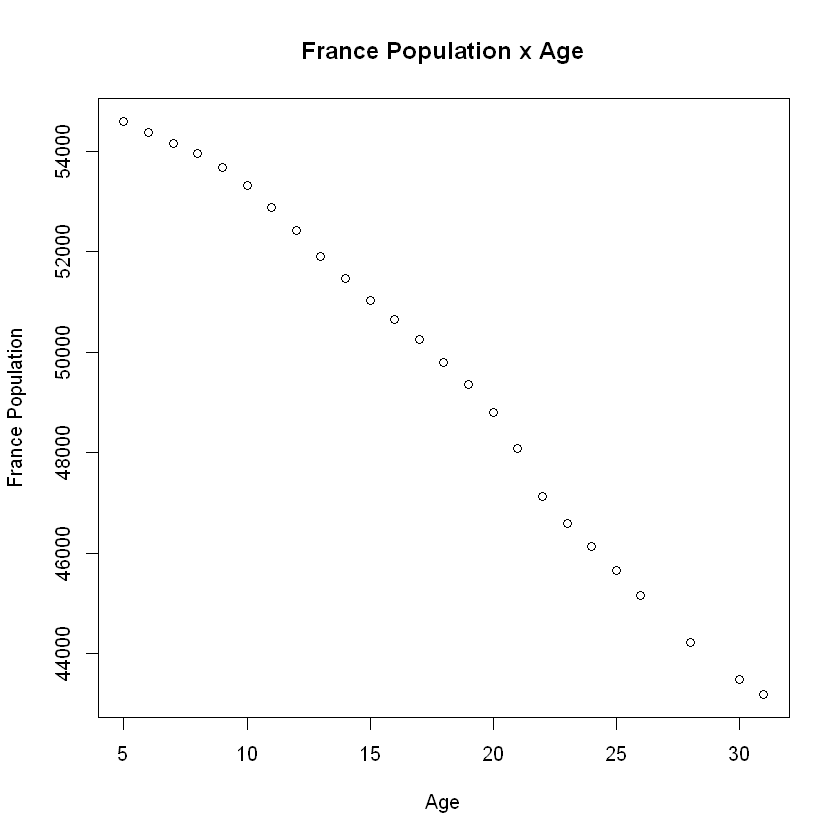

In [13]:
plot(wine$Age, wine$FrancePop, main = "France Population x Age",xlab='Age',ylab='France Population')

In [14]:
cor(wine$Age, wine$FrancePop)

[1] -0.9944851

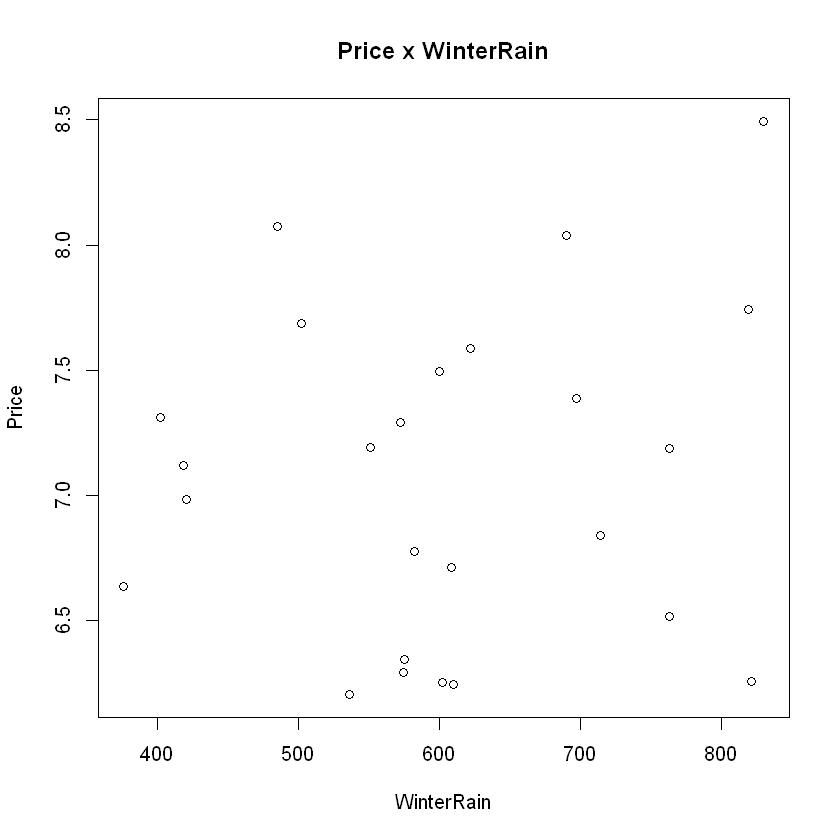

In [15]:
plot(wine$WinterRain, wine$Price, main = "Price x WinterRain",xlab='WinterRain',ylab='Price')

In [16]:
cor(wine$WinterRain, wine$Price)

[1] 0.1366505

#### Matrix Correlation

In [17]:
cor(wine)

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
Year,1.00000000,-0.4477679,0.016970024,-0.24691585,0.02800907,-1.00000000,0.994485097
Price,-0.44776786,1.0000000,0.136650547,0.65956286,-0.56332190,0.44776786,-0.466861641
WinterRain,0.01697002,0.1366505,1.000000000,-0.32109061,-0.27544085,-0.01697002,-0.001621627
AGST,-0.24691585,0.6595629,-0.321090611,1.00000000,-0.06449593,0.24691585,-0.259162274
HarvestRain,0.02800907,-0.5633219,-0.275440854,-0.06449593,1.00000000,-0.02800907,0.041264394
Age,-1.00000000,0.4477679,-0.016970024,0.24691585,-0.02800907,1.00000000,-0.994485097
FrancePop,0.99448510,-0.4668616,-0.001621627,-0.25916227,0.04126439,-0.99448510,1.000000000


### Remove Age and FrancePop

In [18]:
model5 = lm(Price ~ AGST + HarvestRain + WinterRain, data=wine)
summary(model5)


Call:
lm(formula = Price ~ AGST + HarvestRain + WinterRain, data = wine)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67472 -0.12958  0.01973  0.20751  0.63846 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.3016263  2.0366743  -2.112 0.046831 *  
AGST         0.6810242  0.1117011   6.097 4.75e-06 ***
HarvestRain -0.0039481  0.0009987  -3.953 0.000726 ***
WinterRain   0.0011765  0.0005920   1.987 0.060097 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.345 on 21 degrees of freedom
Multiple R-squared:  0.7537,	Adjusted R-squared:  0.7185 
F-statistic: 21.42 on 3 and 21 DF,  p-value: 1.359e-06


**Model Analysis**

(AGST only) Multiple R-squared: 0.435, Adjusted R-squared: 0.4105

(AGST + HarvestRain) Multiple R-squared: 0.7074, Adjusted R-squared: 0.6808

(AGST + HarvestRain + WinterRain + Age + FrancePop) Multiple R-squared: 0.8294, Adjusted R-squared: 0.7845

(AGST + HarvestRain + WinterRain + Age) Multiple R-squared:  0.8286,	Adjusted R-squared:  0.7943 -> **Better!**

(AGST + HarvestRain + WinterRain) Multiple R-squared: 0.7537, Adjusted R-squared: 0.7185

## Making Predictions

In [19]:
# Read in test set
wineTest = read.csv("data/wine_test.csv")
head(wineTest)

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>
1,1979,6.9541,717,16.1667,122,4,54835.83
2,1980,6.4979,578,16.0000,74,3,55110.24


In [20]:
str(wineTest)

'data.frame':	2 obs. of  7 variables:
 $ Year       : int  1979 1980
 $ Price      : num  6.95 6.5
 $ WinterRain : int  717 578
 $ AGST       : num  16.2 16
 $ HarvestRain: int  122 74
 $ Age        : int  4 3
 $ FrancePop  : num  54836 55110


### Prediction

In [21]:
predictTest = predict(model4, newdata=wineTest)
predictTest

1        2 
6.768925 6.684910

### Compute R-squared

In [22]:
SSE = sum((wineTest$Price - predictTest)^2)
SST = sum((wineTest$Price - mean(wine$Price))^2)

In [23]:
R2 = 1 - SSE/SST
R2

[1] 0.7944278

What we have developed is a linear regression model, a simple but rather powerful model for predicting quality of wines. It only used few variables and we have seen that it predicted wine prices quite well.